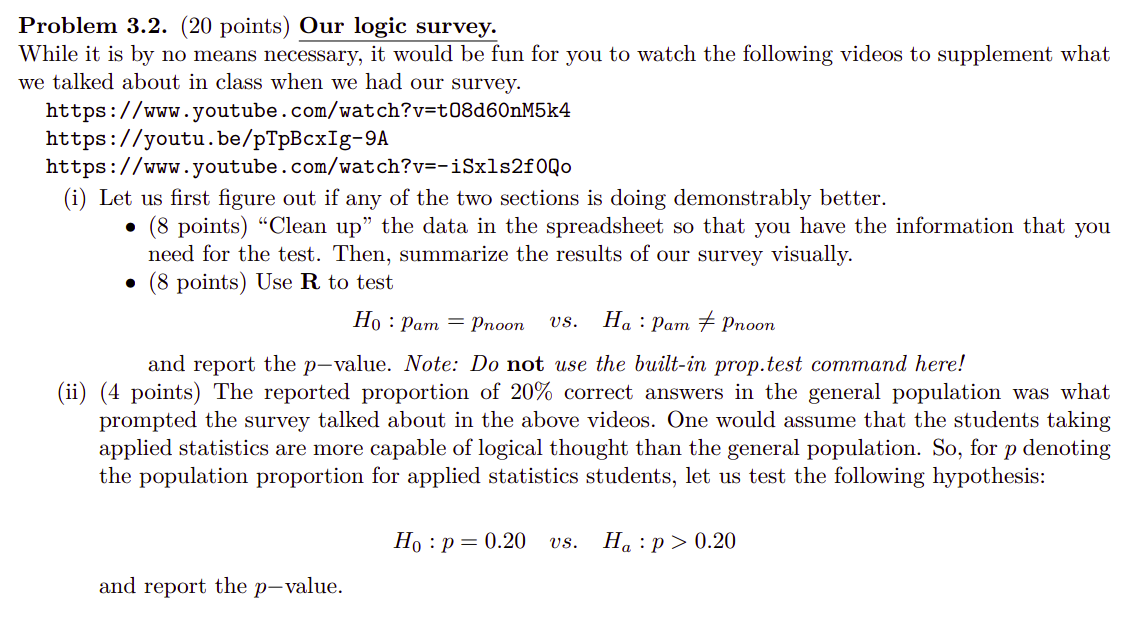

# i)

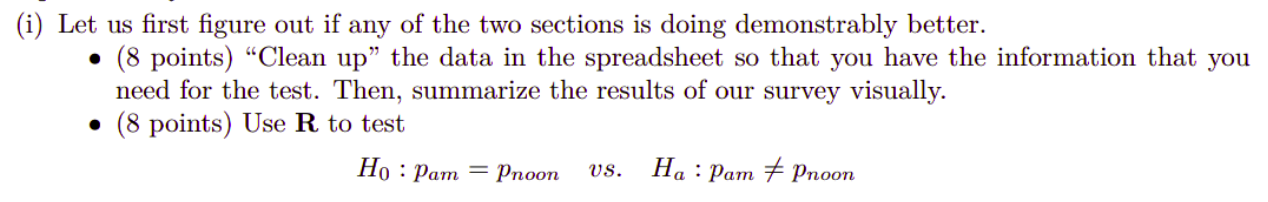

## Step 1: Read Data into Pandas Dataframe

In [3]:
import pandas as pd
data = pd.read_csv('logic-puzzle-abridged.csv')
data

,Timestamp,What's the answer to the above logic puzzle?,My section in M358K (or my friend's or relation's section) is:
0,11/6/2020 10:10,Yes,12noon
1,11/6/2020 10:10,No,11am
2,11/6/2020 10:11,Yes,12noon
3,11/6/2020 10:11,Yes,11am
4,11/6/2020 10:12,Yes,11am
...,...,...,...
87,11/9/2020 12:04,Cannot be determined,11am
88,11/9/2020 12:05,Cannot be determined,12noon
89,11/9/2020 12:48,Cannot be determined,11am
90,11/9/2020 17:07,Cannot be determined,12noon


## Step 2: find the respective proportions of correct answers in AM and Noon sections, $p_{am} \text{ and } p_{noon} $ 

$p_{am} = \frac{(\sum_{am} yes)}{n_{am}} $

$p_{noon} = \frac{(\sum_{noon} yes)}{n_{noon}} $

In [15]:
noon_data = data[data["My section in M358K (or my friend's or relation's section) is:"]\
                 =='12noon']
am_data = data[data["My section in M358K (or my friend's or relation's section) is:"]\
               =='11am']
assert len(am_data)+len(noon_data) == len(data)

In [28]:
noon_success = len(noon_data[noon_data["What's the answer to the above logic puzzle?"]\
                            =='Yes'])
n_noon = len(noon_data)
p_noon = noon_success/n_noon

print("Proportion of correct answer for noon section is {}/{} = {}"\
      .format(noon_success,n_noon,p_noon))

Proportion of correct answer for noon section is 17/40 = 0.425


In [31]:
am_success = len(am_data[am_data["What's the answer to the above logic puzzle?"]\
                            =='Yes'])
n_am = len(am_data)
p_am = am_success/n_am

print("Proportion of correct answer for noon section is {}/{} = {}"\
      .format(am_success,n_am,p_am))

Proportion of correct answer for noon section is 22/52 = 0.4230769230769231


## Step 3: Calculate p-value statistic

$ \hat{p} = \frac { x_{am} + x_{noon}}{n_{am}+n_{noon}} = \frac{17+22}{40+52} = 0.423913$

$ z^* = \frac{p_{am}-p_{noon}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_{am}}+\frac{1}{n_{noon}}) }} = -0.0185$

## $ \text{p-value}= 2 \cdot P(Z < -|z|) = 2 \cdot P(Z < -0.0185) = 0.985 $


In [36]:
from scipy.stats import norm

p_hat = (17+22)/(40+52)
z_star = (p_am-p_noon)/( ( p_hat*(1-p_hat)*((1/n_am)+(1/n_noon))) ** (1/2) )

print('Z value for hypothesis: {}'.format(z_star))

print('p-value for hypothesis test: {}'.format(2*norm.cdf(z_star)))

Z value for hypothesis: -0.018503419677563807
p-value for hypothesis test: 0.9852372495252599


# ii)

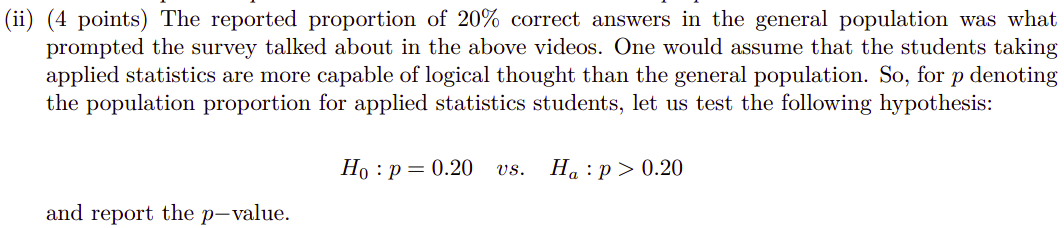

$ \hat{p} = \frac { x_{am} + x_{noon}}{n_{am}+n_{noon}} = \frac{17+22}{40+52} = 0.423913$

$ z^* = \frac{\hat{p}-p_{0}}{\sqrt{ \frac{ p_0(1-p_0) }{n_{am}+n_{noon}} } } = 5.3692$

## $ \text{p-value} = P(Z > z^*) = P(Z > 5.3692) = 3.95\cdot 10^{-8}$


In [43]:
p_hat = (noon_success + am_success)/(n_noon+n_am)

p_not = 0.20

z_star = (p_hat - p_not) / (((p_not*(1-p_not))/(n_am+n_noon))**(1/2))

p_value = 1-norm.cdf(z_star)

p_value

3.953321858762848e-08